# Colab Setup

In [0]:
!nvidia-smi

Sat Sep 28 05:29:00 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 430.40       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P8    27W / 149W |      0MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
!pip install gdown --quiet

In [0]:
!pip install scikit-plot --quiet

In [0]:
!pip install tensorflow-gpu==2.0.0-beta1 --quiet

     |████████████████████████████████| 348.9MB 86kB/s 
     |████████████████████████████████| 3.1MB 15.3MB/s 
     |████████████████████████████████| 501kB 51.8MB/s 


In [0]:
!pip install keras-rectified-adam --quiet

# Imports and Test Data Setup

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
import os
os.environ['TF_KERAS'] = '1'

In [0]:
%env TF_KERAS = 1

env: TF_KERAS=1


In [0]:
import numpy as np
import pandas as pd
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from pathlib import Path

import tensorflow as tf

import pickle
from keras_radam import RAdam
import gdown
import scikitplot as skplt
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import model_from_json
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical

In [0]:
                            # Set up 'ggplot' style
plt.style.use('ggplot')     # if want to use the default style, set 'classic'
plt.rcParams['ytick.right']     = True
plt.rcParams['ytick.labelright']= True
plt.rcParams['ytick.left']      = False
plt.rcParams['ytick.labelleft'] = False
plt.rcParams['font.family']     = 'Arial'

In [0]:
pickles_url = 'https://drive.google.com/uc?export=download&id=1inU1YzIre_Ane2sXu_EmB6DI8L48EZnI'
pickles_file = 'cnn_pickles_fixed.zip'

gdown.download(pickles_url, pickles_file, quiet=True)

'cnn_pickles_fixed.zip'

In [0]:
models_url = 'https://drive.google.com/uc?export=download&id=1tP7sekah3Fdc7jIAlwNXsMo9KufoRlRY'
models_file = 'cnn_models.zip'

gdown.download(models_url, models_file, quiet=True)

'cnn_models.zip'

In [0]:
basepath = Path('.')

In [0]:
!unzip -qq cnn_pickles_fixed.zip

In [0]:
!unzip -qq cnn_models.zip

In [0]:
X = pickle.load(open(basepath/"X3c64f.pickle","rb"))
y = pickle.load(open(basepath/"y3c64f.pickle","rb"))

X = X.astype('float32')/255
y = to_categorical(y)

In [0]:
tsDat = X[2860:]
tsLbl = y[2860:]

In [0]:
def test_model(modelname):

    filepath = basepath/f'{modelname}.hdf5'

    with open(basepath/f'{modelname}_arch.json', 'r') as f:
        modelGo = model_from_json(f.read())

    modelGo.load_weights(filepath.as_posix())

    modelGo.compile(loss='categorical_crossentropy', 
                    optimizer='adam', 
                    metrics=['accuracy'])

    predicts    = modelGo.predict(tsDat)
    predout     = np.argmax(predicts,axis=1)
    testout     = np.argmax(tsLbl,axis=1)
    labelname   = ['Roti Prata',
                'Chicken Rice',
                'Bak Chor Mee',]

    testScores  = metrics.accuracy_score(testout,predout)
    confusion   = metrics.confusion_matrix(testout,predout)

    print("Best accuracy (on testing dataset): %.2f%%" % (testScores*100))
    print(metrics.classification_report(testout,predout,target_names=labelname,digits=4))
    print(confusion)
    skplt.metrics.plot_confusion_matrix(testout, predout, normalize=True)

# Test Models

## Standard Convolution Neural Network

Best accuracy (on testing dataset): 79.75%
              precision    recall  f1-score   support

  Roti Prata     0.7640    0.7432    0.7535       183
Chicken Rice     0.8018    0.7841    0.7929       227
Bak Chor Mee     0.8274    0.8797    0.8528       158

    accuracy                         0.7975       568
   macro avg     0.7977    0.8024    0.7997       568
weighted avg     0.7968    0.7975    0.7968       568

[[136  33  14]
 [ 34 178  15]
 [  8  11 139]]


/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


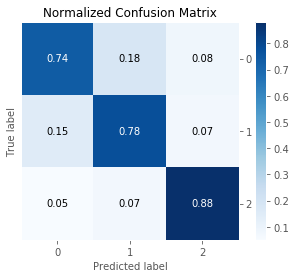

In [0]:
test_model('CNNModel')

## ResNet

Best accuracy (on testing dataset): 95.42%
              precision    recall  f1-score   support

  Roti Prata     0.9215    0.9617    0.9412       183
Chicken Rice     0.9558    0.9515    0.9536       227
Bak Chor Mee     0.9934    0.9494    0.9709       158

    accuracy                         0.9542       568
   macro avg     0.9569    0.9542    0.9552       568
weighted avg     0.9552    0.9542    0.9544       568

[[176   6   1]
 [ 11 216   0]
 [  4   4 150]]


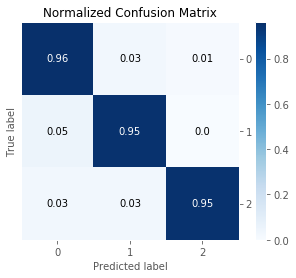

In [0]:
test_model('ResNetModel')

## VGG

Best accuracy (on testing dataset): 88.38%
              precision    recall  f1-score   support

  Roti Prata     0.8453    0.8361    0.8407       183
Chicken Rice     0.8889    0.9163    0.9024       227
Bak Chor Mee     0.9216    0.8924    0.9068       158

    accuracy                         0.8838       568
   macro avg     0.8853    0.8816    0.8833       568
weighted avg     0.8839    0.8838    0.8837       568

[[153  20  10]
 [ 17 208   2]
 [ 11   6 141]]


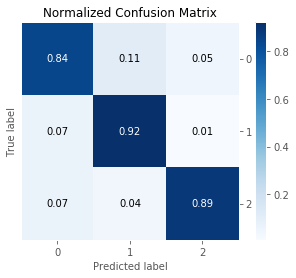

In [0]:
test_model('VGGModel')

## InceptionResNet

Best accuracy (on testing dataset): 94.54%
              precision    recall  f1-score   support

  Roti Prata     0.9031    0.9672    0.9340       183
Chicken Rice     0.9638    0.9383    0.9509       227
Bak Chor Mee     0.9735    0.9304    0.9515       158

    accuracy                         0.9454       568
   macro avg     0.9468    0.9453    0.9455       568
weighted avg     0.9469    0.9454    0.9456       568

[[177   4   2]
 [ 12 213   2]
 [  7   4 147]]


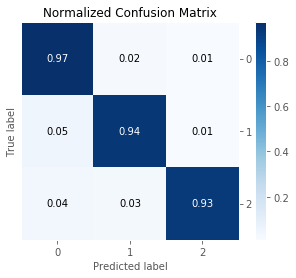

In [0]:
test_model('InceptionResNetModel')